In [12]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

%matplotlib inline

# 1. Load Data and Models

### - Data

In [2]:
conn = sqlite3.connect("./data/DisasterResponse.db")
df = pd.read_sql('select * from DisasterResponse', con=conn)

In [21]:
df[df['related']==0][:1]['message']

5    Information about the National Palace-
Name: message, dtype: object

### - Models

In [8]:
def tokenize(text):
    tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()

    clean_tokens = []
    for tok in tokens:
        clean_tok = lemmatizer.lemmatize(tok).lower().strip()
        clean_tokens.append(clean_tok)

    return clean_tokens

In [9]:
pkl_fle = open('./model/classifier.pkl', 'rb')
model = pickle.load(pkl_fle)

In [10]:
X = df['message']
y_pred = model.predict(X)

# 2. Graphics

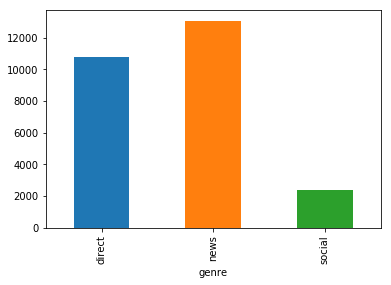

In [15]:
df.groupby('genre').count()['message'].plot.bar()

In [22]:
cat = df.columns[-36:]

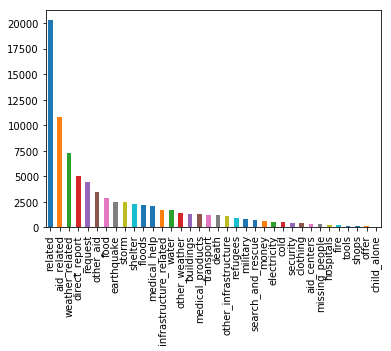

In [27]:
df[cat].sum(axis=0).sort_values(ascending=False).plot.bar()

In [29]:
df[cat].sum(axis=0).sort_values(ascending=False).index

Index(['related', 'aid_related', 'weather_related', 'direct_report', 'request',
       'other_aid', 'food', 'earthquake', 'storm', 'shelter', 'floods',
       'medical_help', 'infrastructure_related', 'water', 'other_weather',
       'buildings', 'medical_products', 'transport', 'death',
       'other_infrastructure', 'refugees', 'military', 'search_and_rescue',
       'money', 'electricity', 'cold', 'security', 'clothing', 'aid_centers',
       'missing_people', 'hospitals', 'fire', 'tools', 'shops', 'offer',
       'child_alone'],
      dtype='object')

In [35]:
df[df['aid_related']==1]['message']

1                  Is the Hurricane over or is it not over
3        UN reports Leogane 80-90 destroyed. Only Hospi...
7        Please, we need tents and water. We are in Sil...
9        I am in Croix-des-Bouquets. We have health iss...
10       There's nothing to eat and water, we starving ...
12       I am in Thomassin number 32, in the area named...
13       Let's do it together, need food in Delma 75, i...
15       A Comitee in Delmas 19, Rue ( street ) Janvier...
16       We need food and water in Klecin 12. We are dy...
21                          I'm in Laplaine, I am a victim
22       There's a lack of water in Moleya, please info...
23       Those people who live at Sibert need food they...
26       People I'm at Delma 2, we don't anything what ...
27       We are at Gressier we needs assistance right a...
28       How can we get water and food in Fontamara 43 ...
29       We need help. Carrefour has been forgotten com...
31       We have a lot of problem at Delma 75 Avenue Al.